<a href="https://colab.research.google.com/github/anderhos/Applied-Machine-Learning/blob/master/CA1_DAT300.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CA1 - DAT300 - Compulsory Assignment 1
 - Kaggle name : Group_2
 - Group number : Group 2 
 - Members : Anders Mølmen Høst , Ghazal Azadi ,Meera Joseph

#### 1. Import modules

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### 2. Load data

In [ ]:

train_df = pd.read_csv('X_train.csv')
y_train_df = pd.read_csv('y_train.csv')
test_df = pd.read_csv('X_test.csv')
whole_df = train_df
whole_df['Concrete compressive strength(MPa, megapascals)'] = y_train_df


In [ ]:
whole_df.shape

(618, 9)

In [ ]:
# ============================================
# Check for null values and 0's in each column
# ============================================
whole_df.isna().sum()


Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [ ]:

(whole_df == 0).astype(int).sum(axis=0)

Cement (component 1)(kg in a m^3 mixture)                  0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    279
Fly Ash (component 3)(kg in a m^3 mixture)               335
Water  (component 4)(kg in a m^3 mixture)                  0
Superplasticizer (component 5)(kg in a m^3 mixture)      232
Coarse Aggregate  (component 6)(kg in a m^3 mixture)       0
Fine Aggregate (component 7)(kg in a m^3 mixture)          0
Age (day)                                                  0
Concrete compressive strength(MPa, megapascals)            0
dtype: int64

##### Dropping columns with 0 values and outliers decreased the r2_score of the model hence keeping them after testing all the scenarios. See section 4.1.1.2 regarding the outliers.

#### 3. EXPLORATORY DATA ANALYSIS
### Inspect the data 
 Visualise important characteristics

Two major issues to focus on:
  - Overfitting caused by too many features
  - Multicolliniearity between features

Distribution plot - pair plot 

Ploting the distribution plot for exploratory analysis and it could be observed that the features are highly correlated to eachother
which urges us to apply feature reduction technique while creating a regression model

Have a quick look at the joint distribution of few pairs of columns from the training set

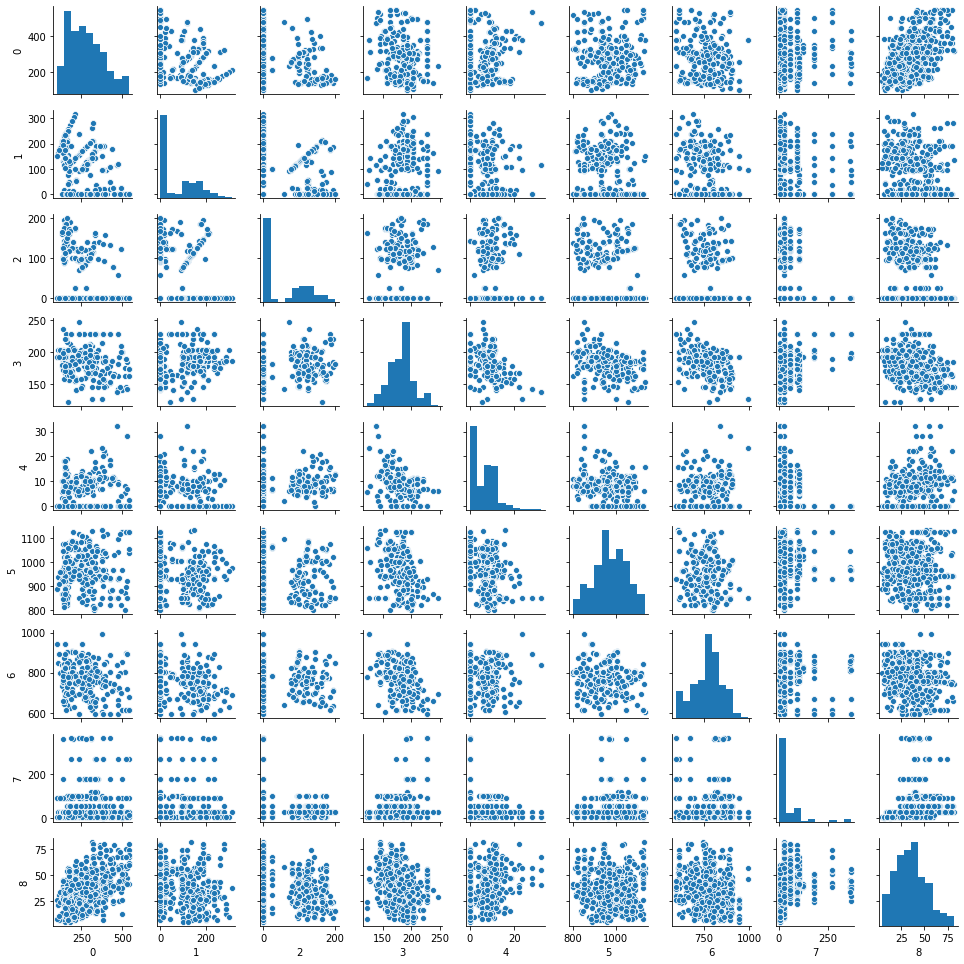

In [ ]:
# to find the correlation between the features , 
# positive correlated, negative correlated , no relation
# to see if the relations are linear or not , if
# there is non linearity it means a simple multiple regression
# won't work well on the data 

# We substitute the feature names with integers to make the
# plot more readable
rename_dict = {value:key for key,value in enumerate(whole_df.columns)} 
renamed_df = whole_df.rename(columns=rename_dict)

# Plotting for the renamed columns
sns.pairplot(renamed_df, height=1.5)
plt.tight_layout()
plt.show()


## 4. Prediction of concrete compressive strength

###### Task description: 
Use scikit-learn tools to predict the compressive strength of the data found on Kaggle. Apply necessary data splitting, cross-validations, grid searches or whatever you need to tune your models. These two models form the minimum requirement for part 
- 1:Linear model (e.g. ordinary regression, possibly regularized).
- 2.Ensemble model (e.g. random forest or similar)
- 3.Use Tensorflow 2.0 (Keras) to create an ANN predicting the same concrete strength. Find a good balance of layers, nodes, regularization to perform well. Only the ANN results will be part of the competition.

## 4.1 LINEAR MODEL

#### 4.1.1 Ordinary Linear Squares regression via scikit learn

In [ ]:
X = whole_df.iloc[:, :-1].values # All except last label
y = whole_df['Concrete compressive strength(MPa, megapascals)'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [ ]:
sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)



In [ ]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

#### 4.1.1.1 Residual plot

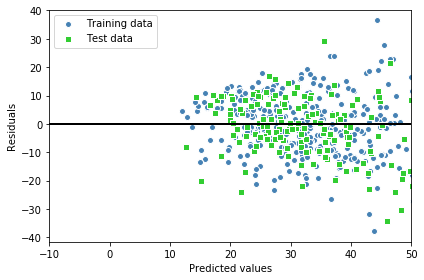

In [ ]:


plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

#### 4.1.1.2 Performance metrics

In [ ]:


print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

print('RMSE train: %.3f, test: %.3f' % (
        np.sqrt(mean_squared_error(y_train, y_train_pred)),
        np.sqrt(mean_squared_error(y_test, y_test_pred))))

MSE train: 106.526, test: 112.618
R^2 train: 0.582, test: 0.607


##### Heteroscedastic noise in the residual plot suggested presence of outliers in the data set that has to be preprocessed.





#### A) Handling outliers in the data set


In [ ]:

#### NON STANDARDISED DATA REMOVE OUTLIERS
z_scores = stats.zscore(whole_df)
#calculate z-scores of `df`
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
train_df_no_outliers = whole_df[filtered_entries]
train_df_no_outliers.shape


(589, 9)

In [ ]:
print("Number of outliers :",len(train_df.index)- len(train_df_no_outliers))

Number of outliers : 29


#### 4.1.2 OLS without outliers

In [ ]:
X = train_df_no_outliers.iloc[:, :-1].values # All except last label
y = train_df_no_outliers['Concrete compressive strength(MPa, megapascals)'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [ ]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

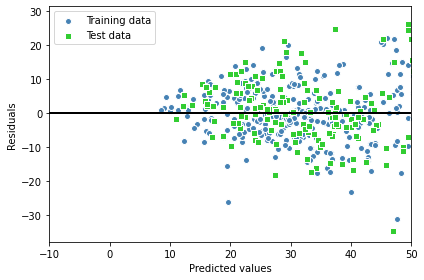

In [ ]:

plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

In [ ]:


print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
print('RMSE train: %.3f, test: %.3f' % (
        np.sqrt(mean_squared_error(y_train, y_train_pred)),
        np.sqrt(mean_squared_error(y_test, y_test_pred))))

MSE train: 77.933, test: 96.750
R^2 train: 0.705, test: 0.638
RMSE train: 8.828, test: 9.836


###### Removing outliers improved the r2 score of simple linear regression model. However differences between training and test scores indicates overfitting. We keep the outliers, since more examples might reduce the degree of overfitting.

#### 4.1.3 Regularized regression 

- It solves the problem of overfitting 
- We want a generalisedmodel with low bias and low variance 

##### Tried Lasso , ridge and elastic net regression on the data set without removing outliers as outliers lead to overfitting in these cases as well. We also tried using regularised regression on data sets preprocessed by polynomial features (both quadratic and cubic features) for improving the model accuracy. 

#### 4.1.4 Preprocessing data for modeling nonlinear relationships
##### The prediction performances can be increased with other preprocessing tools and further regularizations. OLS was repeated on preprocessed data along with the regularised regression and it was found that elastic net and Lasso regression on cubic transformed data set gave the best r2 score among the linear models.

#### 4.1.5 Using ridge, lasso and elanet on cubic transformed data

In [ ]:
# Reset data to include outliers
X = whole_df.iloc[:, :-1].values # All except last label
y = whole_df['Concrete compressive strength(MPa, megapascals)'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [ ]:
cubic = PolynomialFeatures(degree=3)
X_cubic_train = cubic.fit_transform(X_train)
X_cubic_test = cubic.fit_transform(X_test)

#### (i) ELANET on CUBIC DATA

In [ ]:


elanet = elanet = ElasticNet(alpha=0.00001, l1_ratio=0)    # Try me!
#X_cubic_train = cubic.fit_transform(X_train)
#X_cubic_test = cubic.fit_transform(X_test)
elanet.fit(X_cubic_train, y_train)
y_train_pred = elanet.predict(X_cubic_train)
y_test_pred = elanet.predict(X_cubic_test)
#print(lasso.coef_)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('RMSE train: %.3f, test: %.3f' % (
        np.sqrt(mean_squared_error(y_train, y_train_pred)),
        np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 27.170, test: 42.863
RMSE train: 5.213, test: 6.547
R^2 train: 0.893, test: 0.850


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5868.822340472034, tolerance: 11.010692657595007
  positive)


#### (ii) LASSO on cubic data

In [ ]:

lasso = Lasso(alpha=0.2)    
lasso.fit(X_cubic_train, y_train)
y_train_pred = lasso.predict(X_cubic_train)
y_test_pred = lasso.predict(X_cubic_test)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('RMSE train: %.3f, test: %.3f' % (
        np.sqrt(mean_squared_error(y_train, y_train_pred)),
        np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 27.196, test: 42.782
RMSE train: 5.215, test: 6.541
R^2 train: 0.893, test: 0.851


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5979.152350068256, tolerance: 11.010692657595007
  positive)


##### Both Elatic net and Lasso regression on polynomial features (cubic) data set gives the best r2_score in case of Linear regression models

## 4.2 NON -LINEAR MODEL: REGRESSION TREE

#### 4.2.1 Random Forest Regressor

In [ ]:
cubic = PolynomialFeatures(degree=3)
X_cubic_train = cubic.fit_transform(X_train)
X_cubic_test = cubic.fit_transform(X_test)

In [ ]:

forest = RandomForestRegressor( criterion='mse',random_state=1,n_jobs=-1)

# Define the pipeline (scaling and classification method):
#pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))

# Define ranges of parameter values:
param_range  = [10,20,30,40,50,60,100,150,200,300,400,500,600,1000]


param_grid = [{'n_estimators': param_range}]

gs = GridSearchCV(estimator=forest, 
                  param_grid=param_grid, 
                  scoring='r2', 
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_cubic_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

In [ ]:


forest = RandomForestRegressor(n_estimators=18, 
                               criterion='mse',
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_cubic_train, y_train)
y_train_pred = forest.predict(X_cubic_train)
y_test_pred = forest.predict(X_cubic_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 5.952, test: 35.182
R^2 train: 0.977, test: 0.877


#### 4.2.2 Decision Tree Regressor

In [ ]:

tree = DecisionTreeRegressor()
param_range  = [2,3,4,5,6,8,10,12,14,16,18,20,22]


param_grid = [{'max_depth': param_range}]

gs = GridSearchCV(estimator=tree, 
                  param_grid=param_grid, 
                  scoring='r2', 
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_cubic_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

In [ ]:

tree = DecisionTreeRegressor(max_depth =3)
tree.fit(X_cubic_train, y_train)
y_train_pred = tree.predict(X_cubic_train)
y_test_pred = tree.predict(X_cubic_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 58.876, test: 85.976
R^2 train: 0.769, test: 0.700


Among the non-linear models Random forest is our best model.

## 4.3 Use Tensorflow 2.0 (Keras) to create an ANN predicting the same concrete strength

In [ ]:
# =============================================================================
# Import modules
# =============================================================================

import keras
import pandas as pd
from sklearn.model_selection import train_test_split

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import losses
import matplotlib.pyplot as plt

### 4.3.1 Inspect data

In [ ]:
# =============================================================================
# Load data
# =============================================================================
whole_train_data = pd.read_csv('X_train.csv')

whole_train_targets = pd.read_csv('y_train.csv')

whole_test_data = pd.read_csv('X_test.csv')


In [ ]:
whole_data = whole_train_data
whole_data["Concrete compressive strength(MPa, megapascals)"]= whole_train_targets
whole_data.head(5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,376.0,0.0,0.0,214.6,0.00,1003.5,762.36,28,31.971002
1,141.3,212.0,0.0,203.5,0.00,971.8,748.50,28,29.892232
2,389.9,189.0,0.0,145.9,22.00,944.7,755.80,3,40.596347
3,424.0,22.0,132.0,178.0,8.48,882.0,750.00,3,32.011386
4,350.0,0.0,0.0,186.0,0.00,1050.0,770.00,28,34.294536


In [ ]:
whole_data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,618.000000,618.00000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,279.573220,73.95966,54.507945,181.851537,6.047505,974.788350,770.756197,45.991909,35.379932
std,106.241869,85.24380,63.763533,20.947062,5.910278,75.538967,80.024256,64.971643,16.276264
min,102.000000,0.00000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,4.782206
25%,190.085000,0.00000,0.000000,165.865000,0.000000,932.000000,721.375000,7.000000,23.849492
50%,272.700000,22.00000,0.000000,185.000000,6.275000,968.000000,778.450000,28.000000,34.266957
75%,350.000000,143.00000,117.540000,192.000000,10.000000,1028.400000,822.000000,56.000000,44.520204
max,540.000000,316.10000,200.100000,246.900000,32.200000,1134.300000,992.600000,365.000000,81.751169


Since there are huge variations in the minimum and maximum values of each feature  we standardise it to bring it to the same scale

In [ ]:
# ================================
# Standardise the data set
# =================================
mean = whole_train_data.mean(axis=0)
whole_train_data -= mean
std = whole_train_data.std(axis = 0)
whole_train_data /= std


whole_test_data -= mean
whole_test_data /= std

In [ ]:
# =============================================================================
# Split data into test and training data set
# =============================================================================
train_data, test_data, train_targets, test_target = train_test_split(
    whole_train_data, whole_train_targets, test_size=0.3, random_state=28)

In [ ]:
train_data.shape

(432, 8)

In [ ]:
test_data.shape

(186, 8)

In [ ]:
train_targets.shape

(432, 1)

In [ ]:
test_target.shape

(186, 1)

### 4.3.2 The model 

#### Build the model

In [ ]:
# =================================
# Building the model
# =================================

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential([
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(1)])
  
    
    model.compile(optimizer= 'rmsprop', loss='mse', metrics=['mae'])
    return model
#model = build_model()



We will now train our model for 550 epochs (550 iterations over all samples in the `x_train` and `y_train` tensors), in mini-batches of 240 
samples. 

What had been observed here was that the number of neurons can change the performance of the model significantly. And by test and error, seems like for this specific problem, 128 neurons in two layers work fine.

### 4.3.3 Train the model
We will now train the model with 600 epochs  and 240 batchsize using 4  fold cross validation

In [ ]:
k = 4 
num_val_samples = len(train_data) // k
num_epochs = 600
all_val_mae_histories = []
all_val_loss_histories = []
all_train_mae_histories = []
all_train_loss_histories = []

for i in range(k):
    print('processing fold #', i)
    
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=240, verbose=0)
    
    val_mae_history = history.history['val_mae']
    train_mae_history = history.history['mae']
    train_loss_values = history.history['loss']
    val_loss_values = history.history['val_loss']
    all_val_mae_histories.append(val_mae_history)
    all_val_loss_histories.append(val_loss_values)
    all_train_mae_histories.append(train_mae_history)
    all_train_loss_histories.append(train_loss_values)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
average_val_mae_history = [
    np.mean([x[i] for x in all_val_mae_histories]) for i in range(num_epochs)]
average_val_loss_history = [
    np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_train_mae_history = [
    np.mean([x[i] for x in all_train_mae_histories]) for i in range(num_epochs)]
average_train_loss_history = [
    np.mean([x[i] for x in all_train_loss_histories]) for i in range(num_epochs)]

Let's use Matplotlib to plot the 
learning curves for training and validation loss side by side, as well as the training and validation mae:

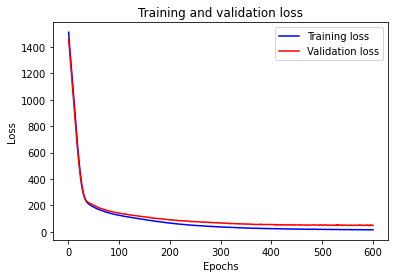

In [ ]:

loss_values = average_train_loss_history
val_loss_values = average_val_loss_history

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

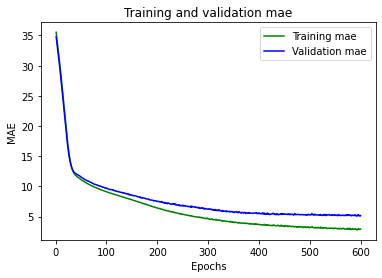

In [ ]:
plt.clf()   # clear figure
mae = average_train_mae_history
val_mae = average_val_mae_history

plt.plot(epochs, mae, 'g', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

We observe that the test data generalises the training data hence these settings gives the best result at 550 epochs 240 batch size and 2 layers with 128 neurons and so we can build a neural network with these settings and make predictions

### 4.3.4 Inspect the model

Use summary method to print a simple description of the model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 17,793
Trainable params: 17,793
Non-trainable params: 0
_________________________________________________________________


After we are done tuning the number of epochs, batch size, number of layers and number of neurons we use our best parameters in the final model.

### 4.3.5 Build model with the best setings


In [ ]:


def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential([
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(1)])
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [ ]:
# Get a fresh, compiled model.
model = build_model()

# Train it on the entirety of the data.
model.fit(whole_train_data, whole_train_targets,
          epochs=550, batch_size=240, verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_target)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

6/6 [==============================] - 0s 1ms/step - loss: 1491.5862 - mae: 34.6268


In [ ]:
ypred = model.predict(whole_test_data)
solution = pd.DataFrame(columns = ['Predicted'], data = ypred)
solution.to_csv('_predict3.csv', index_label="Id")

We upload our regression results using our best ANN model to Kaggle, we achive an R^2 score of 0.89048. Hence our ANN beats both our ensemble and linear models.